<a href="https://colab.research.google.com/github/paella-e/butterfly/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔹 **00. Butterfly Classification Notebook Overview**

This notebook builds a butterfly classification model. There are 75 different classifications.

**Data**: [Butterfly Image Classification](https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification) dataset from Kaggle.

* There are 6,499 labeled images in the training set.
* There are 2,786 unlabeled images in the test set.


# 🔹 01. Getting the Notebook ready: Utilize GPU & Import necessary libraries

#### ⮞ **Step 1: Change Runtime from CPU to GPU**

Machine Learning applications benefit from running on a GPU rather than CPU, so we will want to change our Runtime environment. This will allow us to train and run our model faster.


* In Google Colab, go to Runtime > Change runtime type > GPU > Save
* This notebook was made with the T4 GPU option


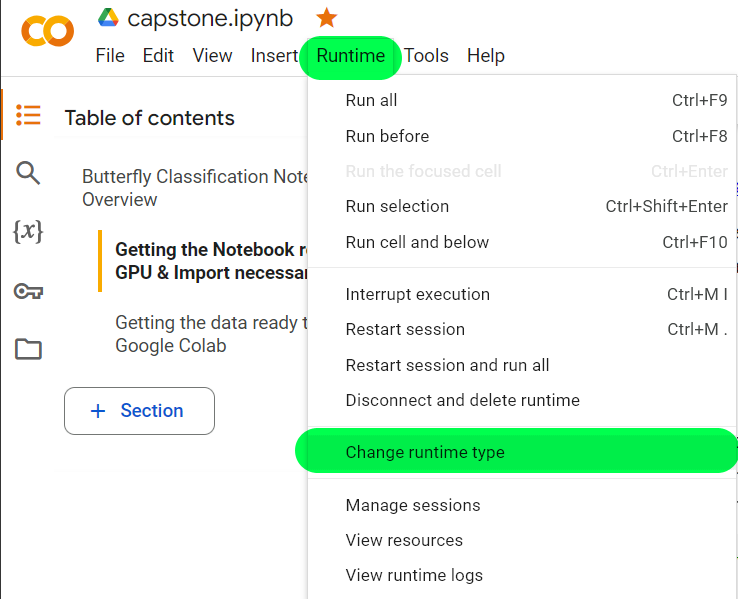

#### ⮞ **Step 2: Import Necessary Libraries**

We will be using TensorFlow and TensorFlow hub to train our model.

In [36]:
# Import TensorFlow and TensorFlow Hub
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np

# If running outside of Google Colab, import Matplotlib

# Print statement to confirm we have succesfully changed our runtime to use a GPU.
print("Success: Using GPU") if tf.config.list_physical_devices() else "Warning: not using GPU"

Success: Using GPU


# 🔹 02. Getting the data ready to use in Google Colab




#### ⮞ **Step 1. Downloading and Unzipping Data**

1. Download the [Butterfly Image Classificaiton](https://www.kaggle.com/competitions/cloud-recognition/data) dataset from Kaggle.
2. Upload the zip file to Google Drive
  * If you cannot use Google Drive, you can upload the data directly to the session, however it will expire with the session and need to be re-uploaded in every subsequent session.
3. Unzip it with the following command:
> !unzip "*ZIP FILE LOCATION*" -d "*DESTINATION PATH*"


---



In [8]:
# Remove the hashtag symbol at the start of the line below and then re-run the cell to run the unzip command if needed
#!unzip "/content/drive/MyDrive/Butterfly/archive.zip" -d "/content/drive/MyDrive/Butterfly/"

#### ⮞ **Step 2. Exploring the Data**

Confirming that the data matches the description on Kaggle and determining if the data needs cleaning.

⮞ TOTAL LABELS & UNIQUE LABELS COUNT: 
              filename           label
count             6499            6499
unique            6499              75
top     Image_6499.jpg  MOURNING CLOAK
freq                 1             131



⮞ Sampling the data - the first 10 entries in the CSV/dataframe
       filename                     label
0   Image_1.jpg          SOUTHERN DOGFACE
1   Image_2.jpg                    ADONIS
2   Image_3.jpg            BROWN SIPROETA
3   Image_4.jpg                   MONARCH
4   Image_5.jpg  GREEN CELLED CATTLEHEART
5   Image_6.jpg           CAIRNS BIRDWING
6   Image_7.jpg  GREEN CELLED CATTLEHEART
7   Image_8.jpg      EASTERN DAPPLE WHITE
8   Image_9.jpg            BROWN SIPROETA
9  Image_10.jpg               RED POSTMAN



⮞ DATA VISUALIZATION


<Axes: ylabel='count'>

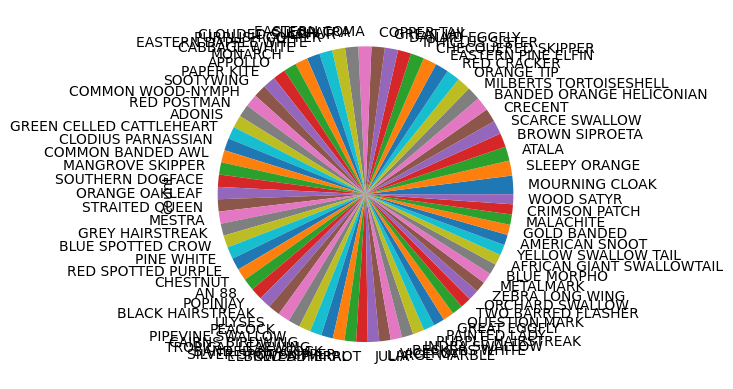

In [47]:
# Create a dataframe
training_labels_csv = pd.read_csv("/content/drive/MyDrive/Butterfly/Training_set.csv")

# Confirming each image in our training set has a label
# There are 6,499 training images so there should be 6,499 labels
print("⮞ TOTAL LABELS & UNIQUE LABELS COUNT: ")
print(training_labels_csv .describe())
print(end='\n\n\n')

# Checking to see what the labeled data from the csv file looks like
print("⮞ Sampling the data - the first 10 entries in the CSV/dataframe")
print(training_labels_csv .head(10))
print(end='\n\n\n')

# Visualization of the distribution of images per label
print("⮞ DATA VISUALIZATION")
training_labels_csv ["label"].value_counts().plot.pie()

#### ⮞ **Step 3. Converting Data**


In [53]:
# DELETE LATER IF NOT NEEDED
# --------------------------

# Making a list of filenames for all of the images in the training data
training_imgs_list = ["/content/drive/MyDrive/Butterfly/train/" + imgname for imgname in training_labels_csv["filename"]]

# Making an array of all of the labels
labels = training_labels_csv["label"].to_numpy()

# Making an array of all the unique labels (species)
species = np.unique(labels)
species




array(['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88',
       'APPOLLO', 'ATALA', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK',
       'BECKERS WHITE', 'BLACK HAIRSTREAK', 'BLUE MORPHO',
       'BLUE SPOTTED CROW', 'BROWN SIPROETA', 'CABBAGE WHITE',
       'CAIRNS BIRDWING', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CLEOPATRA',
       'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMMON BANDED AWL',
       'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH',
       'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE',
       'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'GOLD BANDED',
       'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART',
       'GREY HAIRSTREAK', 'INDRA SWALLOW', 'IPHICLUS SISTER', 'JULIA',
       'LARGE MARBLE', 'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA',
       'METALMARK', 'MILBERTS TORTOISESHELL', 'MONARCH', 'MOURNING CLOAK',
       'ORANGE OAKLEAF', 'ORANGE TIP', 'ORCHARD SWALLOW', 'PAINTED LADY',
       'PAPER KITE', 'PEACOCK', 'PINE WHIT